In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df = df.drop(columns=['CustomerID'] , axis=1)
df = df.dropna()
mapping = {'Male':1 , 'Female':2}
df = df.replace({'Gender':mapping})

In [3]:
kmeans = KMeans(n_clusters=2)

In [4]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
labels = kmeans.labels_

In [6]:
df['labels'] = labels


In [7]:
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)

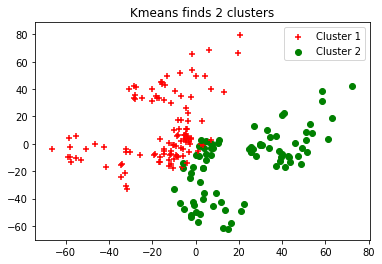

In [8]:
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    else:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    
plt.legend([c1, c2],['Cluster 1', 'Cluster 2'])
plt.title('Kmeans finds 2 clusters')
plt.show()